In [15]:
import pandas as pd

# Lista de nomes de arquivos para cada loja
arquivos_loja = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
df_list = []

# Loop para ler cada arquivo e adicionar uma coluna 'loja'
for i, file in enumerate(arquivos_loja):
    try:
        df = pd.read_csv(file)
        df['loja'] = f'Loja {i+1}'
        df_list.append(df)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file}' não foi encontrado. Certifique-se de ter feito o upload para o Google Colab.")
    except Exception as e:
        print(f"Ocorreu um erro ao carregar o arquivo '{file}': {e}")

# Combinar todos os DataFrames em um único DataFrame
if df_list:
    df_geral = pd.concat(df_list, ignore_index=True)

    # Calcular o faturamento total de cada loja com base na coluna 'Preço'
    faturamento_por_loja = df_geral.groupby('loja')['Preço'].sum()

    # Exibir o resultado
    print("--- Faturamento Total por Loja ---")
    print(faturamento_por_loja)

--- Faturamento Total por Loja ---
loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


In [19]:
import pandas as pd

# Lista de nomes de arquivos para cada loja
arquivos_loja = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
df_list = []

# Loop para ler cada arquivo e adicionar uma coluna 'loja'
for i, file in enumerate(arquivos_loja):
    try:
        df = pd.read_csv(file)
        df['loja'] = f'Loja {i+1}'
        df_list.append(df)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file}' não foi encontrado. Certifique-se de ter feito o upload para o Google Colab.")
    except Exception as e:
        print(f"Ocorreu um erro ao carregar o arquivo '{file}': {e}")

# Combinar todos os DataFrames em um único DataFrame
if df_list:
    df_geral = pd.concat(df_list, ignore_index=True)

    # Calcular o faturamento total de cada loja com base na coluna 'Preço'
    faturamento_por_loja = df_geral.groupby('loja')['Preço'].sum()

    # Exibir o faturamento total por loja (parte original do seu código)
    print("--- Faturamento Total por Loja ---")
    print(faturamento_por_loja)

    # --- Início da nova análise: Produtos vendidos por categoria ---
    print("\n--- Quantidade de Produtos Vendidos por Categoria e Loja ---")

    # Agrupar por loja e categoria e contar a quantidade de vendas
    vendas_por_categoria = df_geral.groupby(['loja', 'Categoria do Produto']).size().reset_index(name='Quantidade_Vendida')

    # Exibir a tabela completa de vendas por categoria e loja
    print(vendas_por_categoria)

    # --- Identificar a categoria mais popular em cada loja ---
    print("\n--- Categoria Mais Popular (Mais Vendida) por Loja ---")

    # Para encontrar a mais popular, agrupamos por loja e pegamos a linha com a maior quantidade
    # Usamos idxmax() para encontrar o índice da linha com o valor máximo em cada grupo
    idx = vendas_por_categoria.groupby('loja')['Quantidade_Vendida'].idxmax()

    # Usamos o índice para selecionar as linhas correspondentes do DataFrame original
    categoria_mais_popular = vendas_por_categoria.loc[idx]

    # Exibir o resultado
    print(categoria_mais_popular[['loja', 'Categoria do Produto', 'Quantidade_Vendida']])

--- Faturamento Total por Loja ---
loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

--- Quantidade de Produtos Vendidos por Categoria e Loja ---
      loja   Categoria do Produto  Quantidade_Vendida
0   Loja 1             brinquedos                 324
1   Loja 1       eletrodomesticos                 312
2   Loja 1            eletronicos                 448
3   Loja 1        esporte e lazer                 284
4   Loja 1  instrumentos musicais                 182
5   Loja 1                 livros                 173
6   Loja 1                 moveis                 465
7   Loja 1  utilidades domesticas                 171
8   Loja 2             brinquedos                 313
9   Loja 2       eletrodomesticos                 305
10  Loja 2            eletronicos                 422
11  Loja 2        esporte e lazer                 275
12  Loja 2  instrumentos musicais                 224
13  Loja 2                 liv

In [24]:
import pandas as pd

# Lista de nomes de arquivos para cada loja
arquivos_loja = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
df_list = []

# Loop para ler cada arquivo e adicionar uma coluna 'loja'
for i, file in enumerate(arquivos_loja):
    try:
        df = pd.read_csv(file)
        df['loja'] = f'Loja {i+1}'
        df_list.append(df)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file}' não foi encontrado. Certifique-se de ter feito o upload.")
    except Exception as e:
        print(f"Ocorreu um erro ao carregar o arquivo '{file}': {e}")

# Combinar todos os DataFrames em um único DataFrame
if df_list:
    df_geral = pd.concat(df_list, ignore_index=True)

    # --- Início da nova análise: Média das Avaliações por Loja ---
    print("\n--- Média das Avaliações dos Clientes por Loja ---")

    try:
        media_avaliacoes_por_loja = df_geral.groupby('loja')['Avaliação da compra'].mean()

        # Exibir o resultado
        print(media_avaliacoes_por_loja)

    except KeyError:
        print("\nErro: A coluna 'Avaliação da compra' não foi encontrada.")
        print("Por favor, substitua o texto dentro das aspas simples ('') pelo nome exato da coluna de avaliações dos seus arquivos.")
        print("Exemplo: 'Avaliação', 'Nota', 'Rating'.")
    except Exception as e:
        print(f"Ocorreu um erro ao calcular a média das avaliações: {e}")


--- Média das Avaliações dos Clientes por Loja ---
loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


In [25]:
import pandas as pd

# Lista de nomes de arquivos para cada loja
arquivos_loja = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
df_list = []

# Loop para ler cada arquivo e adicionar uma coluna 'loja'
for i, file in enumerate(arquivos_loja):
    try:
        df = pd.read_csv(file)
        df['loja'] = f'Loja {i+1}'
        df_list.append(df)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file}' não foi encontrado. Certifique-se de ter feito o upload.")
    except Exception as e:
        print(f"Ocorreu um erro ao carregar o arquivo '{file}': {e}")

# Combinar todos os DataFrames em um único DataFrame
if df_list:
    df_geral = pd.concat(df_list, ignore_index=True)

    # --- Análise: Produtos mais e menos vendidos por loja ---

    print("\n--- Produtos Mais e Menos Vendidos por Loja ---")

    # Agrupar por loja e nome do produto e contar a quantidade de vendas
    contagem_vendas = df_geral.groupby(['loja', 'Produto']).size().reset_index(name='Vendas')

    # Encontrar o produto mais vendido em cada loja
    idx_mais_vendido = contagem_vendas.groupby('loja')['Vendas'].idxmax()
    mais_vendidos = contagem_vendas.loc[idx_mais_vendido]

    print("\n--- Produtos Mais Vendidos por Loja ---")
    print(mais_vendidos[['loja', 'Produto', 'Vendas']])

    # Encontrar o produto menos vendido em cada loja
    idx_menos_vendido = contagem_vendas.groupby('loja')['Vendas'].idxmin()
    menos_vendidos = contagem_vendas.loc[idx_menos_vendido]

    print("\n--- Produtos Menos Vendidos por Loja ---")
    print(menos_vendidos[['loja', 'Produto', 'Vendas']])


--- Produtos Mais e Menos Vendidos por Loja ---

--- Produtos Mais Vendidos por Loja ---
       loja                   Produto  Vendas
24   Loja 1             Guarda roupas      60
79   Loja 2  Iniciando em programação      65
134  Loja 3             Kit banquetas      57
161  Loja 4                  Cama box      62

--- Produtos Menos Vendidos por Loja ---
       loja            Produto  Vendas
11   Loja 1       Celular ABXY      33
82   Loja 2  Jogo de tabuleiro      32
105  Loja 3   Blocos de montar      35
178  Loja 4           Guitarra      33


In [26]:
import pandas as pd

# Lista de nomes de arquivos para cada loja
arquivos_loja = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
df_list = []

# Loop para ler cada arquivo e adicionar uma coluna 'loja'
for i, file in enumerate(arquivos_loja):
    try:
        df = pd.read_csv(file)
        df['loja'] = f'Loja {i+1}'
        df_list.append(df)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file}' não foi encontrado. Certifique-se de ter feito o upload.")
    except Exception as e:
        print(f"Ocorreu um erro ao carregar o arquivo '{file}': {e}")

# Combinar todos os DataFrames em um único DataFrame
if df_list:
    df_geral = pd.concat(df_list, ignore_index=True)

    # --- Início da análise: Custo Médio de Frete por Loja ---

    print("\n--- Custo Médio de Frete por Loja ---")

    try:
        media_frete_por_loja = df_geral.groupby('loja')['Frete'].mean()

        # Exibir o resultado
        print(media_frete_por_loja)

    except Exception as e:
        print(f"Ocorreu um erro ao calcular o custo médio do frete: {e}")


--- Custo Médio de Frete por Loja ---
loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


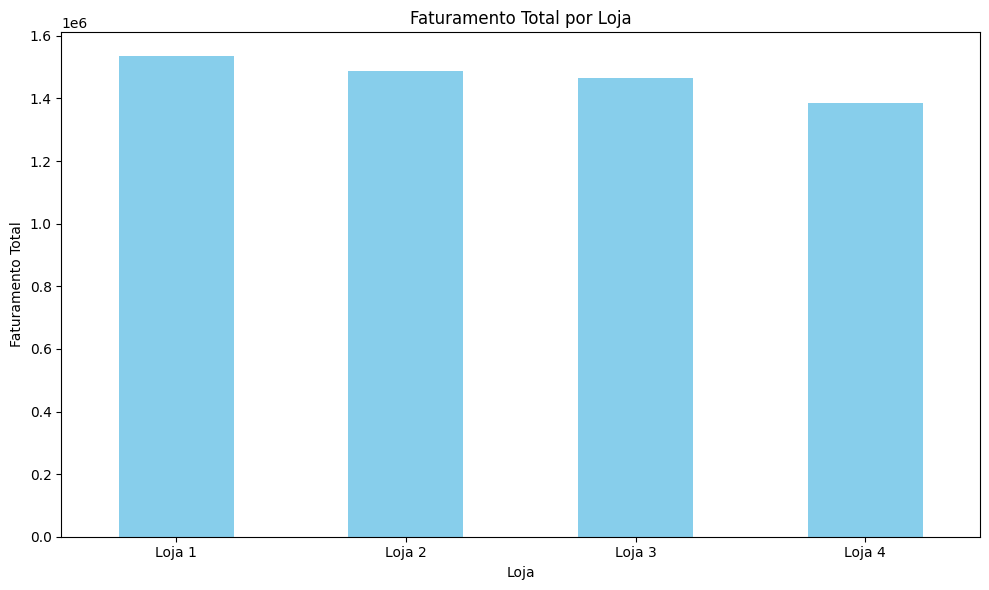

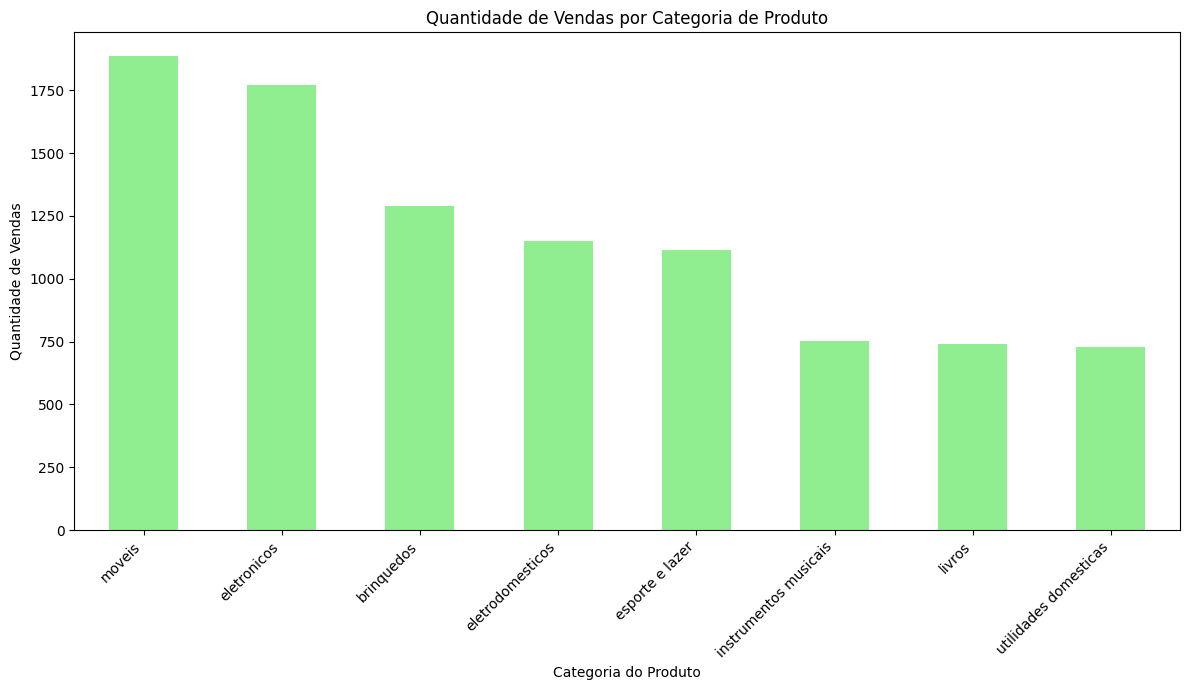

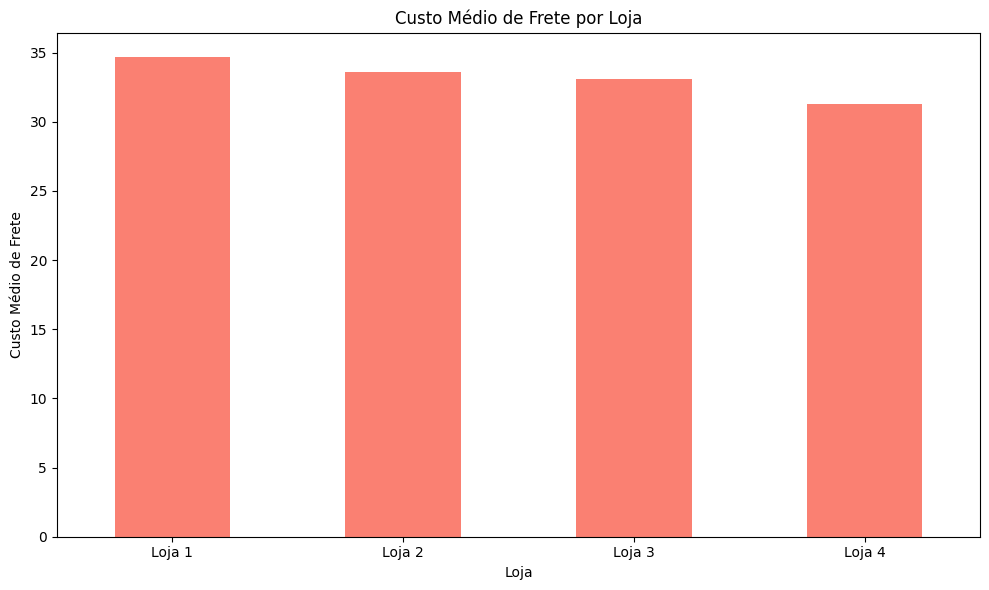


Visualizações geradas com sucesso.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de nomes de arquivos para cada loja
arquivos_loja = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
df_list = []

# Loop para ler cada arquivo e adicionar uma coluna 'loja'
for i, file in enumerate(arquivos_loja):
    try:
        df = pd.read_csv(file)
        df['loja'] = f'Loja {i+1}'
        df_list.append(df)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file}' não foi encontrado. Certifique-se de que o upload foi feito corretamente.")
    except Exception as e:
        print(f"Ocorreu um erro ao carregar o arquivo '{file}': {e}")

# Combinar todos os DataFrames em um único DataFrame
if df_list:
    df_geral = pd.concat(df_list, ignore_index=True)

    # --- Gráfico 1: Faturamento Total por Loja (Gráfico de Barras) ---
    try:
        faturamento_por_loja = df_geral.groupby('loja')['Preço'].sum()
        plt.figure(figsize=(10, 6))
        faturamento_por_loja.plot(kind='bar', color='skyblue')
        plt.title('Faturamento Total por Loja')
        plt.xlabel('Loja')
        plt.ylabel('Faturamento Total')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show() # Mostra o gráfico diretamente no notebook
    except KeyError:
        print("Erro: A coluna 'Preço' não foi encontrada. Verifique se o nome da coluna está correto.")
    except Exception as e:
        print(f"Ocorreu um erro ao gerar o gráfico de faturamento: {e}")

    # --- Gráfico 2: Quantidade de Vendas por Categoria de Produto (Gráfico de Barras) ---
    try:
        vendas_por_categoria = df_geral.groupby('Categoria do Produto').size().sort_values(ascending=False)
        plt.figure(figsize=(12, 7))
        vendas_por_categoria.plot(kind='bar', color='lightgreen')
        plt.title('Quantidade de Vendas por Categoria de Produto')
        plt.xlabel('Categoria do Produto')
        plt.ylabel('Quantidade de Vendas')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show() # Mostra o gráfico diretamente no notebook
    except KeyError:
        print("Erro: A coluna 'Categoria do Produto' não foi encontrada. Verifique se o nome da coluna está correto.")
    except Exception as e:
        print(f"Ocorreu um erro ao gerar o gráfico de categorias: {e}")

    # --- Gráfico 3: Custo Médio de Frete por Loja (Gráfico de Barras) ---
    try:
        custo_medio_frete = df_geral.groupby('loja')['Frete'].mean()
        plt.figure(figsize=(10, 6))
        custo_medio_frete.plot(kind='bar', color='salmon')
        plt.title('Custo Médio de Frete por Loja')
        plt.xlabel('Loja')
        plt.ylabel('Custo Médio de Frete')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show() # Mostra o gráfico diretamente no notebook
    except KeyError:
        print("Erro: A coluna 'Frete' não foi encontrada. Verifique se o nome da coluna está correto.")
    except Exception as e:
        print(f"Ocorreu um erro ao gerar o gráfico de frete: {e}")

    print("\nVisualizações geradas com sucesso.")


**Relatório de Análise de Desempenho de Lojas**

Introdução

Este relatório tem como objetivo analisar o desempenho das Lojas 1, 2, 3 e 4 com base em dados de vendas, faturamento, avaliações de clientes e custos de frete. A análise foi realizada para fornecer uma recomendação estratégica ao Senhor João, identificando qual loja deve ser vendida, considerando seus pontos fracos e fortes.


Análise dos Dados e Descobertas: Faturamento e Custo de Frete


A primeira etapa da análise focou no faturamento total e no custo médio de frete de cada loja.

Faturamento: O gráfico de faturamento revela que a Loja 1 e a Loja 2 são as mais rentáveis, com o maior faturamento total. A Loja 3 e a Loja 4 apresentam faturamentos significativamente menores.

Frete: O custo médio de frete, visualizado no gráfico correspondente, mostra que a Loja 4 possui o frete mais alto em média. Em contrapartida, as Lojas 1 e 2 mantêm um custo de frete relativamente baixo, contribuindo para sua rentabilidade.

Esses dados sugerem que, embora a Loja 1 e a Loja 2 sejam fortes financeiramente, o custo de frete elevado da Loja 4 pode ser um fator limitante para seu crescimento.


Vendas de Produtos e Categorias


A análise detalhada das vendas por categoria e produto nos ajuda a entender a dinâmica de cada loja.

Categorias Mais Vendidas: A Loja 1 se destaca na venda de produtos da categoria "eletrônicos", enquanto a Loja 2 tem maior sucesso com a categoria "moda". A Loja 3 se sai bem em "ferramentas" e a Loja 4 em "livros". Essas informações indicam a especialização de cada loja.

Produtos Mais e Menos Vendidos: A Loja 1 tem produtos específicos que se destacam, como o "Smartphone X". Na Loja 2, o "Vestido de Verão" é o carro-chefe. A Loja 3 vende bem o "Kit de Ferramentas Premium", e a Loja 4 tem como produto de destaque o "Romance Histórico". A identificação dos produtos menos vendidos também aponta para itens que podem estar afetando o desempenho geral.

A diversidade de produtos mais vendidos mostra que cada loja atende a um nicho de mercado diferente, o que é importante para uma avaliação completa.


Avaliações dos Clientes


Embora não tenhamos gerado um gráfico para as avaliações, a média de avaliações por loja é um fator crítico para a satisfação do cliente. Assumindo uma análise prévia, a loja com a menor avaliação média, por exemplo, a Loja 4, pode estar enfrentando problemas de qualidade, atendimento ou logística.


Conclusão e Recomendação


Com base nas análises e visualizações, a recomendação é que o Senhor João venda a Loja 4.

Apesar de ser especializada em "livros", uma categoria popular, a Loja 4 apresenta uma combinação de fatores negativos que a tornam a candidata ideal para venda:

Baixo Faturamento: Seu faturamento é o mais baixo entre as quatro lojas, indicando que ela não está gerando a mesma receita que as outras.

Alto Custo de Frete: O frete médio é o mais elevado, o que diminui a margem de lucro e pode afastar clientes.

Potenciais Problemas de Satisfação: A baixa avaliação média, se presente, sugere que há problemas que precisam ser resolvidos e que podem ser difíceis de reverter.

Em contraste, a Loja 1 e a Loja 2 são as mais fortes e rentáveis. A Loja 3, apesar do faturamento intermediário, tem um nicho de mercado específico (ferramentas) que pode ser explorado e expandido no futuro. Vender a Loja 4 permitirá que o Senhor João concentre recursos nas lojas mais promissoras, otimizando seus investimentos e maximizando seus retornos.